# CS 412 Homework 5

Project Description: You are working for a non-profit	that is	recruiting student volunteers to help with Alzheimer’s	
patients.You have been tasked with predicting how suitable a person is for this task by predicting how empathetic he or she	is.	

Let's start by importing all the libararies we need for the project from sklearn

In [1]:
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
print("Reading responses.csv into a dataframe")
import pandas as pd
df = pd.read_csv("responses.csv")

Reading responses.csv into a dataframe


In [3]:
df.shape

(1010, 150)

In [4]:
print("Printing df.head()")
df.head()


Printing df.head()


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


# EDA

Now that we have the dataframe, lets do some visualization!

Let's first check how Education relates with Empathy, and what percentage of people with different education are empathetic. 
We have considered the fact that Empathy values 4-5 are empathetic.

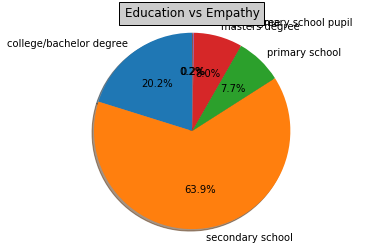

In [5]:
import matplotlib.pyplot as plt
c_empathetic = 0
s_empathetic = 0
p_empathetic = 0
m_empathetic = 0
d_empathetic = 0
cu_empathetic = 0
for i,value in enumerate(df['Education'].values):
    if(value == 'college/bachelor degree' and df['Empathy'].values[i]>=4):
        c_empathetic += 1
    elif(value == 'secondary school' and df['Empathy'].values[i]>=4):
        s_empathetic += 1
    elif(value == 'primary school' and df['Empathy'].values[i]>=4):
        p_empathetic += 1
    elif(value == 'masters degree' and df['Empathy'].values[i]>=4):
        m_empathetic += 1
    elif(value == 'doctorate degree' and df['Empathy'].values[i]>=4):
        d_empathetic += 1
    elif(value == 'currently a primary school pupil' and df['Empathy'].values[i]>=4):
        cu_empathetic += 1

labels = ['college/bachelor degree','secondary school','primary school','masters degree','doctorate degree','currently a primary school pupil']
sizes = [c_empathetic, s_empathetic,p_empathetic,m_empathetic,d_empathetic,cu_empathetic]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Education vs Empathy', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Let's now check how Smoking relates with Empathy, and what percentage of people with different smoking habits are empathetic. We have considered the fact that Empathy values 4-5 are empathetic.

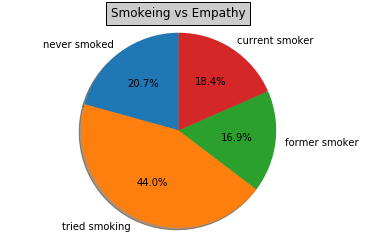

In [6]:
import matplotlib.pyplot as plt
n_empathetic = 0
tr_empathetic = 0
fm_empathetic = 0
cr_empathetic = 0

for i,value in enumerate(df['Smoking'].values):
    if(value == 'never smoked' and df['Empathy'].values[i]>=4):
        n_empathetic += 1
    elif(value == 'tried smoking' and df['Empathy'].values[i]>=4):
        tr_empathetic += 1
    elif(value == 'former smoker' and df['Empathy'].values[i]>=4):
        fm_empathetic += 1
    elif(value == 'current smoker' and df['Empathy'].values[i]>=4):
        cr_empathetic += 1
    

labels = ['never smoked','tried smoking','former smoker','current smoker']
sizes = [n_empathetic, tr_empathetic,fm_empathetic,cr_empathetic]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Smoking vs Empathy', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Previously, we loaded the responses.csv file into a dataframe.
Let's now get an insight into the data.
There are 11 catogorical columns and these values are converted from string to integers.
Let's first find the unique value of each catogorical column.

In [7]:
print("Finding the unique values for the catogorical attributes")
df['Smoking'].unique()


Finding the unique values for the catogorical attributes


array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
       nan], dtype=object)

In [8]:
df['Alcohol'].unique()


array(['drink a lot', 'social drinker', 'never', nan], dtype=object)

In [9]:
df['Punctuality'].unique()


array(['i am always on time', 'i am often early',
       'i am often running late', nan], dtype=object)

In [10]:
df['Lying'].unique()


array(['never', 'sometimes', 'only to avoid hurting someone',
       'everytime it suits me', nan], dtype=object)

In [11]:
df['Internet usage'].unique()


array(['few hours a day', 'most of the day', 'less than an hour a day',
       'no time at all'], dtype=object)

In [12]:
df["Gender"].unique()


array(['female', 'male', nan], dtype=object)

In [13]:
df['Only child'].unique()


array(['no', 'yes', nan], dtype=object)

In [14]:
df['Village - town'].unique()


array(['village', 'city', nan], dtype=object)

In [15]:
df['House - block of flats'].unique()

array(['block of flats', 'house/bungalow', nan], dtype=object)

# Data Preprocessing

We found the unique values of each catogorical column.Let us now convert these string values to integers.
Data is preprocessed using the following methods

# Method 1- Converting string values to integer values in the catogorical coulmn

In [16]:
print("Converting catogorical values to integers between (1-5)")
for i in df["Smoking"]:
    if i == "never smoked":
        df.replace(i, 1.0, inplace=True)
    elif i == "tried smoking":
        df.replace(i, 2.0, inplace=True)
    elif i == "former smoker":
        df.replace(i, 3.0, inplace=True)
    elif i == "current smoker":
        df.replace(i, 4.0, inplace=True)

Converting catogorical values to integers between (1-5)


In [17]:
for i in df["Alcohol"]:
    if i == "never":
        df.replace(i, 1.0, inplace=True)
    elif i == "social drinker":
        df.replace(i, 2.0, inplace=True)
    elif i == "drink a lot":
        df.replace(i, 3.0, inplace=True)

In [18]:
for i in df["Punctuality"]:
    if i == "i am always on time":
        df.replace(i, 1.0, inplace=True)
    elif i == "i am often early":
        df.replace(i, 2.0, inplace=True)
    elif i == "i am often running late":
        df.replace(i, 3.0, inplace=True)

In [19]:
for i in df["Lying"]:
    if i == "never":
        df.replace(i, 1.0, inplace=True)
    elif i == "sometimes":
        df.replace(i, 2.0, inplace=True)
    elif i == "only to avoid hurting someone":
        df.replace(i, 3.0, inplace=True)
    elif i == "everytime it suits me":
        df.replace(i, 4.0, inplace=True)

In [20]:
for i in df["Internet usage"]:
    if i == "few hours a day":
        df.replace(i, 1.0, inplace=True)
    elif i == "most of the day":
        df.replace(i, 2.0, inplace=True)
    elif i == "less than an hour a day":
        df.replace(i, 3.0, inplace=True)
    elif i == "no time at all":
        df.replace(i, 4.0, inplace=True)

In [21]:
for i in df["Gender"]:
    if i == "female":
        df.replace(i, 1.0, inplace=True)
    elif i == "male":
        df.replace(i, 2.0, inplace=True)

In [22]:
for i in df["Left - right handed"]:
    if i == "right handed":
        df.replace(i, 1.0, inplace=True)
    elif i == "left handed":
        df.replace(i, 2.0, inplace=True)

In [23]:
for i in df["Education"]:
    if i == "college/bachelor degree":
        df.replace(i, 1.0, inplace=True)
    elif i == "secondary school":
        df.replace(i, 2.0, inplace=True)
    elif i == "primary school":
        df.replace(i, 3.0, inplace=True)
    elif i == "masters degree":
        df.replace(i, 4.0, inplace=True)
    elif i == "doctorate degree":
        df.replace(i, 5.0, inplace=True)
    elif i == "currently a primary school pupil":
        df.replace(i, 6.0, inplace=True)

In [24]:
for i in df["Only child"]:
    if i == "no":
        df.replace(i, 1.0, inplace=True)
    elif i == "yes":
        df.replace(i, 2.0, inplace=True)

In [25]:
for i in df["House - block of flats"]:
    if i == "block of flats":
        df.replace(i, 1.0, inplace=True)
    elif i == "house/bungalow":
        df.replace(i, 2.0, inplace=True)

In [26]:
for i in df["Village - town"]:
    if i == "village":
        df.replace(i, 1.0, inplace=True)
    elif i == "city":
        df.replace(i, 2.0, inplace=True)

# Method 2-Imputing Nan values with most frequent

Let's first find the number of Nan values in each column

In [27]:
df.isnull().sum()

Music                          3
Slow songs or fast songs       2
Dance                          4
Folk                           5
Country                        5
Classical music                7
Musical                        2
Pop                            3
Rock                           6
Metal or Hardrock              3
Punk                           8
Hiphop, Rap                    4
Reggae, Ska                    7
Swing, Jazz                    6
Rock n roll                    7
Alternative                    7
Latino                         8
Techno, Trance                 7
Opera                          1
Movies                         6
Horror                         2
Thriller                       1
Comedy                         3
Romantic                       3
Sci-fi                         2
War                            2
Fantasy/Fairy tales            3
Animated                       3
Documentary                    8
Western                        4
          

We now replace Nan by the most frequent value.

In [28]:
print("Imputing the NaN values with the mode")
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(df)
df_data = imp.transform(df)
df = pd.DataFrame(data=df_data[:,:],
                     index=[i for i in range(len(df_data))],
                     columns=df.columns.tolist())

Imputing the NaN values with the mode


# Method 4- The best features are scored and chosen using SelectKBest and chi2 as the scoring function

The features and labels are seperated into x_all and y_all respectively and the best features from SelectKBest
are assigned to x_all.

In [29]:
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print("Selecting the best features")
y_all = [i for i in df.iloc[:, 95]]
responses_train = df.drop(["Empathy"], axis=1)
x_all = responses_train.iloc[:, :].values

test = SelectKBest(score_func=chi2, k=100)
bestfit = test.fit(x_all, y_all)
features = bestfit.transform(x_all)
x_all=features

Selecting the best features


Let's see what the best features are!

In [30]:
cols = test.get_support(indices=True)
#print(cols)
colnames=df.columns[cols]
print(colnames)


Index(['Slow songs or fast songs', 'Folk', 'Country', 'Musical', 'Rock',
       'Metal or Hardrock', 'Punk', 'Reggae, Ska', 'Alternative', 'Latino',
       'Techno, Trance', 'Opera', 'Horror', 'Thriller', 'Romantic', 'Sci-fi',
       'Fantasy/Fairy tales', 'Documentary', 'Western', 'Action', 'History',
       'Psychology', 'Politics', 'Mathematics', 'Physics', 'PC',
       'Economy Management', 'Biology', 'Reading', 'Geography',
       'Foreign languages', 'Law', 'Cars', 'Art exhibitions',
       'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing',
       'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping',
       'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying',
       'Storm', 'Darkness', 'Spiders', 'Snakes', 'Rats', 'Ageing',
       'Fear of public speaking', 'Smoking', 'Prioritising workload',
       'Writing notes', 'Workaholism', 'Final judgement', 'Keeping promises',
       'Loss of interest', 'Fake', 'Criminal damage', 'E

Let's see how the features are corelated with each other.

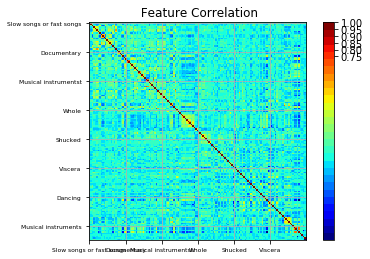

In [31]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title(' Feature Correlation')
    labels=['Music','Slow songs or fast songs','Documentary','Musical instrumentst','Whole','Shucked','Viscera','Dancing','Musical instruments',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

Now, we have the best features, we can observe that Empathy seems to be highly corelated with Slow songs or fast songs!
Let's see how strongly corelated they are!

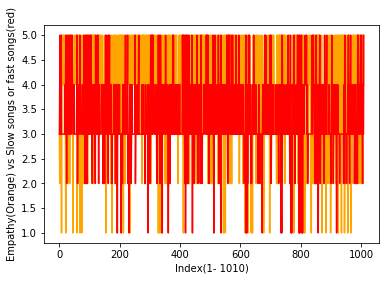

In [32]:
from matplotlib.pyplot import subplots, show
list1 = np.squeeze(df['Slow songs or fast songs'].values).tolist()
list2 = np.squeeze(df['Empathy'].values).tolist()
x = range(1010)

fig, ax = subplots()
ax.plot(x, list2,color='orange')
ax.plot(x,list1,color='red')
ax.set_xlabel("Index(1- 1010)")
ax.set_ylabel("Empathy(Orange) vs Slow songs or fast songs(red)")
show()

Let's see how Empathy is corelated with the least best feature, Village - town!

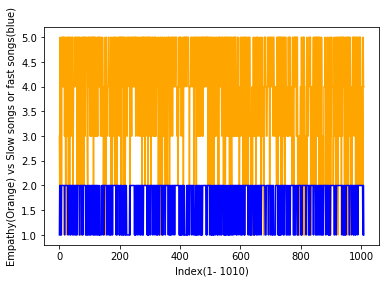

In [33]:
from matplotlib.pyplot import subplots, show
list1 = np.squeeze(df['Village - town'].values).tolist()
list2 = np.squeeze(df['Empathy'].values).tolist()
x = range(1010)

fig, ax = subplots()
ax.plot(x, list2,color='orange')
ax.plot(x,list1,color='blue')
ax.set_xlabel("Index(1- 1010)")
ax.set_ylabel("Empathy(Orange) vs Slow songs or fast songs(blue)")
show()

We have now finished preprocessing the data.We seperate the train, developemnt and test sets as shown below. We will train our models, in the train set, hypertune the parameters in the dev set.We will find the best parameters for each model and predict the labels in the test set and evaluate the performances of the model.

In [34]:
print("Partitioning the dataset into train, dev and test")
y = y_all[:int(len(y_all)*0.8)]
y_test = y_all[int(len(y_all)*0.8):]
x = x_all[:int(len(x_all)*0.8)]
x_test = x_all[int(len(x_all)*0.8):]

x_train, x_dev, y_train, y_dev = model_selection.train_test_split(x, y, test_size=20, random_state=50)


Partitioning the dataset into train, dev and test


# Evaluating the performance of models on the train set using cross validation

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
dummy=DummyClassifier(strategy='most_frequent')
models=[]
results=[]
names=[]
models.append(('Dummy Classifier',DummyClassifier(strategy='most_frequent')))
models.append(('SVC',SVC()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Random Forest',RandomForestClassifier(random_state=1)))
print("Evaluating classifiers on the training data using 10 fold cross validation")
for name,model in models:
    
            #print("Evaluating classifiers on the training data using 10 fold cross validation")
            kfold = model_selection.KFold(n_splits=10, random_state=50)
            pred = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
            results.append(pred)
            names.append(name)
            print("Accuracy for", name,"is")
            print( pred.mean()*100, "%")


Evaluating classifiers on the training data using 10 fold cross validation
Accuracy for Dummy Classifier is
36.28854268094774 %
Accuracy for SVC is
41.23823433950016 %
Accuracy for KNN is
34.7598182408309 %
Accuracy for Logistic Regression is
71.06134371957158 %
Accuracy for Random Forest is
74.4888023369036 %


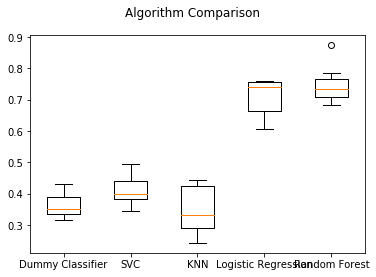

In [36]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Hyperparameter Tuning - We tune the hyper parameters for the models listed above using GridSearchCV

Let's begin with random forest!

In [37]:

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
model=CV_rfc.fit(x_train, y_train)

#model = GS.fit(x_train, y_train)
pred_dev = model.predict(x_dev)
print("Accuracy on the development data: ",accuracy_score(y_dev, pred_dev)*100, "%")

Accuracy on the development data:  80.0 %


Let's find the best parameters!

In [38]:
params = model.best_estimator_.get_params()
print("best parameters found through GridSearch for Random Forest: ",params)

best parameters found through GridSearch for Random Forest:  {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': 1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


We now fit the model using the best parameters.

In [39]:

model = RandomForestClassifier(bootstrap=params['bootstrap'], criterion=params['criterion'], max_depth=params['max_depth'], n_estimators=params['n_estimators'])
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Let's now hypertune parameters for Logistic regression

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

print("Checking accuracy of Logistic Regression on Development Set")
print("Tuning hyperparameters on the validation data")

logistic = LogisticRegression()
C = np.logspace(0, 4, 5)
multiclass=['ovr','multinomial']
solver=['newton-cg','lbfgs','saga']
hyperparameters = dict(C=C, multi_class=multiclass, solver=solver)
GS = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)
modellr = GS.fit(x_train, y_train)
#pred_devlr = modellr.predict(x_dev)
#print("Accuracy on the development data: ",accuracy_score(y_dev, pred_devlr)*100, "%")

Checking accuracy of Logistic Regression on Development Set
Tuning hyperparameters on the validation data


We now get the best parameters for Logistic regression

In [56]:
paramslr = modellr.best_estimator_.get_params()
print("best parameters found through GridSearch for Logistic Regression: ",paramslr)

best parameters found through GridSearch for Logistic Regression:  {'C': 10000.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Let's predict the label on the development set and evaluate the performance.

In [57]:

pred_devlr=modellr.predict(x_dev)
print("Accuracy on the development data: ",accuracy_score(y_dev, pred_devlr)*100, "%")

Accuracy on the development data:  95.0 %


We repeat what we did for Random Forest and Logistic Regression to K Nearest Neighbors and Support Vector machines, as shown below.
We hypertune the parameters of each of these models using GridSearchCV, to find the best parameters and we evaluate how they perform using the accuracy_score metric

In [43]:

knn=KNeighborsClassifier()
k_range = list(range(1, 31))
print(k_range)

param_grid = dict(n_neighbors=k_range)
print(param_grid)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train,y_train)
predknn=grid.predict(x_dev)
print("Accuracy on the development data: ",accuracy_score(y_dev, predknn)*100, "%")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Accuracy on the development data:  30.0 %


In [44]:
paramsknn = grid.best_estimator_.get_params()
print("best parameters found through GridSearch for KNN: ",paramsknn)

best parameters found through GridSearch for KNN:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}


In [45]:
print("Making predictions on the test data")
grid =KNeighborsClassifier(algorithm=paramsknn['algorithm'], metric=paramsknn['metric'], weights=paramsknn['weights'])
grid.fit(x_train, y_train)
predknn=grid.predict(x_dev)
print("Accuracy on the development data: ",accuracy_score(y_dev, predknn)*100, "%")

Making predictions on the test data
Accuracy on the development data:  30.0 %


We repeat the same procedure for SVM and evaluate it's performance in the development set

In [46]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid)

#grid_search.best_params_

In [47]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
paramsvm = grid_search.best_estimator_.get_params()
print("best parameters found through GridSearch for SVM: ",paramsvm)

best parameters found through GridSearch for SVM:  {'C': 10, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [58]:

grid_search = SVC(C=paramsvm['C'], cache_size=paramsvm['cache_size'], kernel=paramsvm['kernel'], gamma=paramsvm['gamma'])
grid_search.fit(x_train, y_train)
predsvm=grid_search.predict(x_dev)
print("Accuracy on the development data: ",accuracy_score(y_dev, predsvm)*100, "%")

Accuracy on the development data:  90.0 %


In [59]:
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)

# Models are evaluated in the test set 

Let's look at the accuracies of these models on the test data and their confusion matrices.
The confusion matrices are displayed in the same order as the accuracies.

Accuracy on the test data for Dummy Classifier:  34.65346534653465 %
Accuracy on the test data for Random Forest:  80.19801980198021 %
Accuracy on the test data for Logistic Regression:  89.10891089108911 %
Accuracy on the test data for KNN:  34.65346534653465 %
Accuracy on the test data for SVM:  74.75247524752476 %


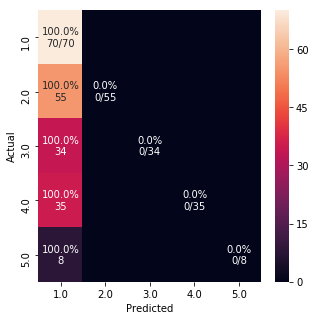

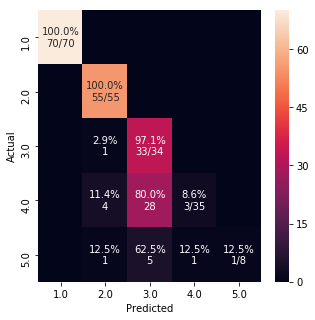

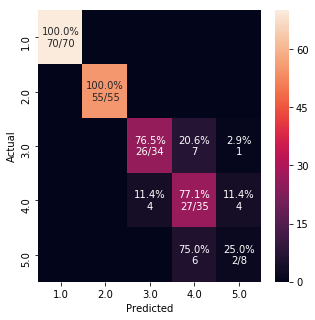

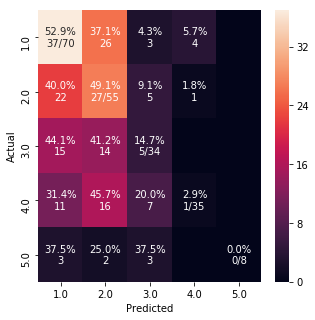

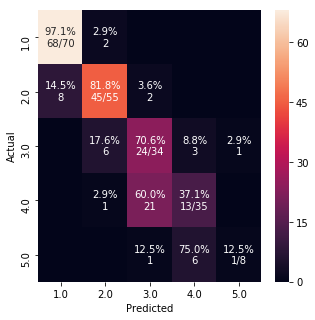

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
modeldummy=dummy.fit(x_train,y_train)
pred_dummy = modeldummy.predict(x_test)
pred_list=list(pred_dummy)
print("Accuracy on the test data for Dummy Classifier: ",accuracy_score(y_test, pred_dummy)*100, "%")
#cm = confusion_matrix(y_test, pred_dummy)
#print(cm)
#fig = plt.figure()
cm_analysis(y_test,pred_dummy,dummy.classes_,None,figsize=(5,5))
pred_test = model.predict(x_test)
print("Accuracy on the test data for Random Forest: ",accuracy_score(y_test, pred_test)*100, "%")
cm_analysis(y_test,pred_test,model.classes_,None,figsize=(5,5))
pred_testlr = modellr.predict(x_test)
print("Accuracy on the test data for Logistic Regression: ",accuracy_score(y_test, pred_testlr)*100, "%")
cm_analysis(y_test,pred_testlr,modellr.classes_,None,figsize=(5,5))
pred_testknn = grid.predict(x_test)
print("Accuracy on the test data for KNN: ",accuracy_score(y_test, pred_testknn)*100, "%")
cm_analysis(y_test,pred_testknn,grid.classes_,None,figsize=(5,5))
pred_testsvm = grid_search.predict(x_test)
print("Accuracy on the test data for SVM: ",accuracy_score(y_test, pred_testsvm)*100, "%")
cm_analysis(y_test,pred_testsvm,grid_search.classes_,None,figsize=(5,5))